In [ ]:
# Q Learning in Python

In [ ]:
# Gym is a toolkit for developing and comparing reinforcement learning algorithms.
#  It supports teaching agents everything from walking to playing games like Pong or Pinball.

In [1]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))




In [2]:
STATES

16

In [3]:
ACTIONS

4

In [4]:
#  4 * 16
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
EPISODES = 3000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment
LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96
RENDER = False # if you want to see training set to true
epsilon = 0.9

In [6]:
rewards = []
for episode in range(EPISODES):

   #get the starting state in Evr. after reset
  state = env.reset()
  for _ in range(MAX_STEPS):  #Explore the env. till the max step;
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      #Random action in Envr.
      action = env.action_space.sample()  
    else:
      #next state of agent
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)
    #we dont' care about the info values _, that's why we ignore it ...

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[2.31250639e-01 1.88624718e-02 1.51947794e-02 2.07254717e-02]
 [3.84067264e-03 1.03652588e-02 1.77375183e-04 1.56747902e-01]
 [4.13686775e-03 3.16157251e-03 6.21044621e-03 2.06301168e-01]
 [3.34473577e-03 3.90129635e-03 2.47142269e-03 1.21783788e-01]
 [2.33586716e-01 1.55870465e-02 1.64483226e-02 1.02997379e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.27035558e-05 2.25676700e-05 1.98534419e-01 6.89990332e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.19686052e-02 1.41666457e-02 1.29140752e-02 5.12153630e-01]
 [3.02558626e-03 6.52279941e-01 6.17141919e-03 4.94767082e-03]
 [1.47545137e-01 2.38241556e-03 1.64587781e-03 1.10553727e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.39692224e-02 2.67217136e-02 8.81169284e-01 4.12265795e-02]
 [9.26028398e-02 9.78605028e-01 7.29933680e-02 9.14983636e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

In [7]:
env.render()

  (Down)
SFFF
FHFH
FFFH
HFFG


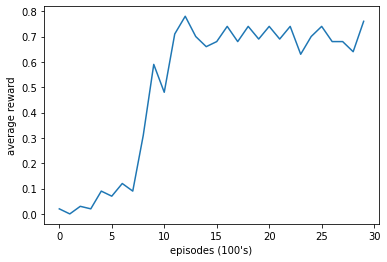

In [8]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()

In [ ]:
#---Sarsa Algorithm----

In [ ]:

import numpy as np 
import gym 


In [ ]:
env = gym.make('FrozenLake-v0') 

In [ ]:

#Defining the different parameters 
epsilon = 0.9
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95
  
#Initializing the Q-matrix 
Q = np.zeros((env.observation_space.n, env.action_space.n)) 


In [ ]:
Q

In [ ]:

#Function to choose the next action 
def choose_action(state): 
    action=0
    if np.random.uniform(0, 1) < epsilon: 
        action = env.action_space.sample() 
    else: 
        action = np.argmax(Q[state, :]) 
    return action 
  
#Function to learn the Q-value 
def update(state, state2, reward, action, action2): 
    predict = Q[state, action] 
    target = reward + gamma * Q[state2, action2] 
    Q[state, action] = Q[state, action] + alpha * (target - predict) 


In [ ]:

#Initializing the reward 
reward=0
  
# Starting the SARSA learning 
for episode in range(total_episodes): 
    t = 0
    state1 = env.reset() 
    action1 = choose_action(state1) 
  
    while t < max_steps: 
        #Visualizing the training 
        env.render() 
          
        #Getting the next state 
        state2, reward, done, info = env.step(action1) 
  
        #Choosing the next action 
        action2 = choose_action(state2) 
          
        #Learning the Q-value 
        update(state1, state2, reward, action1, action2) 
  
        state1 = state2 
        action1 = action2 
          
        #Updating the respective vaLues 
        t += 1
        reward += 1
          
        #If at the end of learning process 
        if done: 
            break


In [ ]:

#Evaluating the performance 
print ("Performace : ", reward/total_episodes) 
  
#Visualizing the Q-matrix 
print(Q) 
